<table> <tr>
        <td  style="background-color:#ffffff;">
            <a href="http://qworld.lu.lv" target="_blank"><img src="..\images\qworld.jpg" width="25%" align="left"> </a></td>
        <td style="background-color:#ffffff;vertical-align:bottom;text-align:right;">
            prepared by <a href="http://abu.lu.lv" target="_blank">Abuzer Yakaryilmaz</a> (<a href="http://qworld.lu.lv/index.php/qlatvia/" target="_blank">QLatvia</a>)
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

<h2>Two Qubits</h2>

Remember that when we have a quantum system with two qubits, then we can represent its states as $ \ket{00}, \ket{01}, \ket{10}, \ket{11} $.

The state $ \ket{ab} $ means that 
<ul>
    <li>the first qubit is in state $ \ket{a} $ and </li>
    <li> the second qubit is in state $ \ket{b} $, </li>
</ul>
where $ a,b \in \{0,1\} $.

$ \ket{ab} = \ket{a} \otimes \ket{b} $ (or shortly $\ket{a}\ket{b}$.

<h3> Task 1 (vector representation)</h3>

Verify the vector representations of $ \ket{00}, \ket{01}, \ket{10}, \ket{11} $:

$$
    \ket{00} = \myvector{1 \\ 0 \\ 0 \\ 0},
    ~~~~~~
    \ket{01} = \myvector{0 \\ 1 \\ 0 \\ 0},
    ~~~~~~
    \ket{10} = \myvector{0 \\ 0 \\ 1 \\ 0},
    ~~~ \mbox{ and }  ~~~
    \ket{11} = \myvector{0 \\ 0 \\ 0 \\ 1}.
$$

<h3> Task 2 (generalization)</h3>

Suppose that we have $ k>1 $ qubits (or bits). 

Then, any deterministic (basis) state can be represented by $ k $ bits:  $ \ket{b_1b_2\cdots b_k} $, where any $ b_j \in \{0,1\} $ for $ 1 \leq j \leq k $.
- What is the size of the vector representing the states of $k$ qubits?
- If the binary value of $ \ket{b_1 b_2 \cdots b_k} $ is $ b $, then which entry is 1?

<h3>Operators on two qubits</h3>

We define a quantum circuit with two qubits and apply the Hadamard operator to each of them.

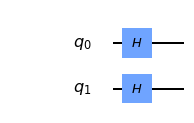

In [5]:
from qiskit import QuantumCircuit

# remark the coincise representation of a quantum circuit
qc = QuantumCircuit(2)

qc.h(0)
qc.h(1)

qc.draw(output='mpl')

These two Hadamards can also be represented as a single quantum operator on two qubits: $ H \otimes H $. 

$$
   H^{\otimes 2} = H \otimes H = \hadamard \otimes \hadamard = \Htwo .
$$

<h3> Unitary backend</h3>

Unitary_simulator gives a single matrix representation of all gates in the circuit until that point.

    job = execute(circuit, Aer.get_backend('unitary_simulator'),optimization_level=0)
    current_unitary = job.result().get_unitary(circuit, decimals=3)
    print(current_unitary)

In [6]:
from qiskit import execute, Aer

job = execute(qc, Aer.get_backend('unitary_simulator'),shots=1,optimization_level=0)
current_unitary = job.result().get_unitary(qc, decimals=3)
for row in current_unitary:
    column = ""
    for entry in row:
        column = column + str(entry.real) + " "
    print(column)

0.5 0.5 0.5 0.5 
0.5 -0.5 0.5 -0.5 
0.5 0.5 -0.5 -0.5 
0.5 -0.5 -0.5 0.5 


<h3> Task 3 </h3>

We define a quantum circuit with two qubits and apply the Hadamard operator to the upper (in reading order) qubit.

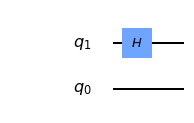

In [3]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h(1)
qc.draw(output='mpl',reverse_bits=True)

The quantum operator applied to both qubits is $ H \otimes I $ in this case.

Read the quantum operator of the above circuit by using 'unitary_simulator' and then verify that it is $ H \otimes I $.

In [4]:
from qiskit import execute, Aer

job = execute(qc, Aer.get_backend('unitary_simulator'),shots=1,optimization_level=0)
current_unitary = job.result().get_unitary(qc, decimals=3)
for row in current_unitary:
    column = ""
    for entry in row:
        column = column + str(entry.real) + " "
    print(column)

0.707 0.0 0.707 0.0 
0.0 0.707 0.0 0.707 
0.707 0.0 -0.707 0.0 
0.0 0.707 0.0 -0.707 


[click for our solution](B50_Two_Qubits_Solutions.ipynb#task3)

<h3>Applying Hadamards to both qubits</h3>

Applying a h-gate to the first and second qubits is the same as applying the following single operator on both qubits:

$$
   H^{\otimes 2} = H \otimes H = \hadamard \otimes \hadamard = \Htwo .
$$

<h4> Case 1: Let's find $ H^{\otimes 2} \ket{00} $ (in three different ways) </h4>
<ul>
    <li> Direct matrix-vector multiplication:
        $$
            H^{\otimes 2} \ket{00} 
            = \Htwo \myvector{1 \\ 0 \\ 0 \\ 0} 
            = \myvector{ \frac{1}{2} \\ \frac{1}{2} \\ \frac{1}{2} \\ \frac{1}{2} } .
        $$ </li> 
    <li> We calculate the quantum state of each state, and then find the quantum state of the composite system.
        $$
            H\ket{0} \otimes H \ket{0} 
            = \stateplus \otimes \stateplus 
            = \myvector{ \frac{1}{2} \\ \frac{1}{2} \\ \frac{1}{2} \\ \frac{1}{2} }.
        $$ </li>
    <li> We make calculations with $ \ket{0} $ and $ \ket{1} $.
        $$
            H \ket{0} \otimes H \ket{0} 
            = \mypar{ \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1} } 
                \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1} }
            = \frac{1}{2} \ket{00} + \frac{1}{2} \ket{01} + \frac{1}{2} \ket{10} + \frac{1}{2} \ket{11} 
            = \myvector{ \frac{1}{2} \\ \frac{1}{2} \\ \frac{1}{2} \\ \frac{1}{2} }.
        $$
</ul>

<hr>
<h3> Task 4 </h3>

Pick one of the following cases (2, 3, or 4), and verify the correctness of all three different ways for this selected case.
<hr>

<h4> Case 2: Let's find $ H^{\otimes 2} \ket{01} $ (in three different ways) </h4>
<ul>
    <li> Direct matrix-vector multiplication:
        $$
            H^{\otimes 2} \ket{01} 
            = \Htwo \myvector{0 \\ 1 \\ 0 \\ 0} 
            = \myrvector{ \frac{1}{2} \\ - \frac{1}{2} \\ \frac{1}{2} \\ - \frac{1}{2} } .
        $$ </li> 
    <li> We calculate the quantum state of each state, and then find the quantum state of the composite system.
        $$
            H\ket{0} \otimes H \ket{1} 
            = \stateplus \otimes \stateminus 
            = \myrvector{ \frac{1}{2} \\ - \frac{1}{2} \\ \frac{1}{2} \\ - \frac{1}{2} }.
        $$ </li>
    <li> We make calculations with $ \ket{0} $ and $ \ket{1} $.
        $$
            H \ket{0} \otimes H \ket{1} 
            = \mypar{ \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1} } 
                \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1} }
            = \frac{1}{2} \ket{00} - \frac{1}{2} \ket{01} + \frac{1}{2} \ket{10} - \frac{1}{2} \ket{11} 
            = \myrvector{ \frac{1}{2} \\ - \frac{1}{2} \\ \frac{1}{2} \\ - \frac{1}{2} }.
        $$
</ul>

<h4> Case 3: Let's find $ H^{\otimes 2} \ket{10} $ (in three different ways) </h4>
<ul>
    <li> Direct matrix-vector multiplication:
        $$
            H^{\otimes 2} \ket{10} 
            = \Htwo \myvector{0 \\ 0 \\ 1 \\ 0} 
            = \myrvector{ \frac{1}{2} \\ \frac{1}{2} \\ - \frac{1}{2} \\ - \frac{1}{2} } .
        $$ </li> 
    <li> We calculate the quantum state of each state, and then find the quantum state of the composite system.
        $$
            H\ket{1} \otimes H \ket{0} 
            = \stateminus \otimes \stateplus 
            = \myrvector{ \frac{1}{2} \\ \frac{1}{2} \\ - \frac{1}{2} \\ - \frac{1}{2} }.
        $$ </li>
    <li> We make calculations with $ \ket{0} $ and $ \ket{1} $.
        $$
            H \ket{1} \otimes H \ket{0} 
            = \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1} } 
                \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1} }
            = \frac{1}{2} \ket{00} + \frac{1}{2} \ket{01} - \frac{1}{2} \ket{10} - \frac{1}{2} \ket{11} 
            = \myrvector{ \frac{1}{2} \\ \frac{1}{2} \\ - \frac{1}{2} \\ -\frac{1}{2} }.
        $$
</ul>

<h4> Case 4: Let's find $ H^{\otimes 2} \ket{11} $ (in three different ways) </h4>
<ul>
    <li> Direct matrix-vector multiplication:
        $$
            H^{\otimes 2} \ket{11} 
            = \Htwo \myvector{0 \\ 0 \\ 0 \\ 1} 
            = \myrvector{ \frac{1}{2} \\ - \frac{1}{2} \\ - \frac{1}{2} \\ \frac{1}{2} } .
        $$ </li> 
    <li> We calculate the quantum state of each state, and then find the quantum state of the composite system.
        $$
            H\ket{1} \otimes H \ket{1} 
            = \stateminus \otimes \stateminus 
            = \myrvector{ \frac{1}{2} \\ - \frac{1}{2} \\ - \frac{1}{2} \\ \frac{1}{2} }.
        $$ </li>
    <li> We make calculations with $ \ket{0} $ and $ \ket{1} $.
        $$
            H \ket{1} \otimes H \ket{1} 
            = \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1} } 
                \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1} }
            = \frac{1}{2} \ket{00} - \frac{1}{2} \ket{01} - \frac{1}{2} \ket{10} + \frac{1}{2} \ket{11} 
            = \myrvector{ \frac{1}{2} \\ - \frac{1}{2} \\ - \frac{1}{2} \\ \frac{1}{2} }.
        $$
</ul>

<hr>

<h3> CNOT operator </h3>

CNOT is an operator defined on two qubits:

$$
    CNOT = \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} .
$$

Its effect is very simple: if the state of the first qubit is one, then the state of the second qubit is flipped. 

If the state of the first qubit is zero, then the state of the second qubit remains the same. 

In summary:
<ul>
    <li>$ CNOT \ket{00} = \ket{00} $, </li>
    <li>$ CNOT \ket{01} = \ket{01} $, </li>
    <li>$ CNOT \ket{10} = \ket{11} $, and, </li>
    <li>$ CNOT \ket{11} = \ket{10} $. </li>
</ul>

CNOT refers to as Controlled-NOT: NOT operator is applied in a controlled way.

<h3> cx-gate </h3>

In Qiskit, CNOT operator is represented as cx-gate.

It takes two arguments: controller-qubit and target-qubit.

Its implementation is as follows:

<i> <b>x-gate</b> (NOT operator) is applied to <u>the target qubit</u> that is <b>CONTROLLED</b> by <u>the controller qubit</u>.</i> 

We apply CNOT operator to the states $ \ket{00}, \ket{01}, \ket{10}, \ket{11} $ and then measure each.

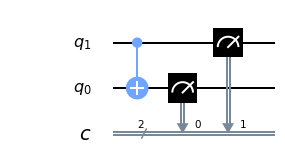

00 --CNOT-> {'00': 1024}


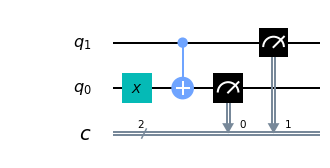

01 --CNOT-> {'01': 1024}


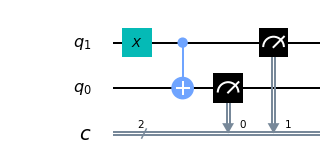

10 --CNOT-> {'11': 1024}


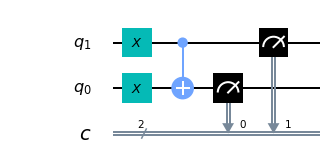

11 --CNOT-> {'10': 1024}


In [7]:
pairs = ['00','01','10','11']
qc_array = []

for pair in pairs:
    from qiskit import QuantumCircuit, execute, Aer
    qc = QuantumCircuit(2,2)
    # initialize the pair
    # we follow the reading order in Qiskit
    if pair[1] == '1':
        qc.x(0)
    if pair[0] =='1':
        qc.x(1)
    qc.cx(1,0)
    qc.measure(0,0)
    qc.measure(1,1)
    display(qc.draw(output='mpl',reverse_bits=True))
    qc_array.append(qc)
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1024)
    counts = job.result().get_counts(qc)
    print(pair,"--CNOT->",counts)

<h3> Task 5 </h3>

Create a quantum curcuit with $ n=5 $ qubits.

Set each qubit to $ \ket{1} $.

Repeat 4 times:
<ul>
    <li>Randomly pick a pair of qubits, and apply cx-gate (CNOT operator) on the pair.</li>
</ul>

Draw your circuit, and execute your program 100 times.

Verify your measurement results by checking the diagram of the circuit. 

qubit1 and qubit2 2 1
qubit1 and qubit2 3 0
qubit1 and qubit2 3 0
qubit1 and qubit2 3 4


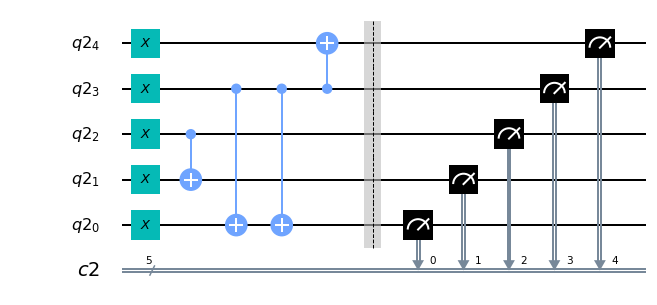

the measurument result is {'01101': 100}
result is 01101 


In [8]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from random import randrange
# 𝑛=5  qubits, Repeat 4 times
n=5 
k=4
#pairs = ['00','01','10','11']
qc_array = []

q =  QuantumRegister(n) 
c = ClassicalRegister(n) 
qc = QuantumCircuit(q,c) 

#Set each qubit to  |1⟩
for i in range(n):
    # apply x-gate (NOT operator)
    qc.x(q[i])
    qc_array.append(1)

# Randomly pick a pair of qubits,
# and apply cx-gate (CNOT operator) on the pair.
for i in range(k):
    qubit1 = randrange(n)
    qubit2 = randrange(n)
    while qubit1 == qubit2:
        qubit2 = randrange(n)
    print("qubit1 and qubit2",qubit1,qubit2)
    
    # apply cx-gate (CNOT operator)
    qc.cx(q[qubit1],q[qubit2])
    # amplitude= 1
    if qc_array[qubit1] == 1: 
        qc_array[qubit2] = 1 - qc_array[qubit2]
        
qc.barrier()
qc.measure(q,c)
    
# draw the circuit 
display(qc.draw(output='mpl',reverse_bits=True))
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc)
print("the measurument result is",counts)

result=" "
for state in qc_array:
    result = str(state) + result
print("result is",result)

[click for our solution](B50_Two_Qubits_Solutions.ipynb#task5)

<h3>Task 6</h3>

Our task is to learn the behavior of the following quantum circuit by doing experiments.

Our circuit has two qubits. 
<ul>
    <li> Apply Hadamard to the both qubits.
    <li> Apply CNOT(first-qubit,second-qubit).
    <li> Apply Hadamard to the both qubits.
    <li> Measure the circuit.
</ul>

Iteratively initialize  the qubits to $ \ket{00} $, $ \ket{01} $, $ \ket{10} $, and $ \ket{11} $.

Execute your program 100 times for each iteration, and then check the outcomes for each iteration. 

Observe that the overall circuit implements CNOT(second-qubit,first-qubit).

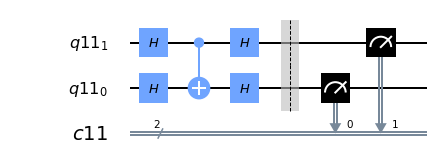

00 is mapped to {'00': 100}


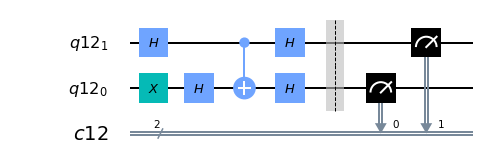

01 is mapped to {'11': 100}


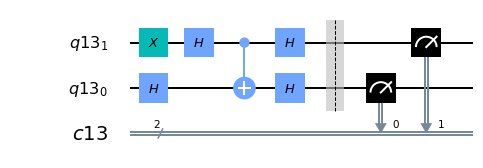

10 is mapped to {'10': 100}


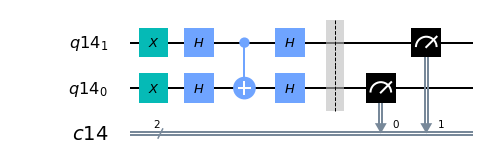

11 is mapped to {'01': 100}


In [14]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
pairs = ['00','01','10','11']

for input in pairs:
    q =  QuantumRegister(2) 
    c = ClassicalRegister(2)
    qc = QuantumCircuit(q,c) 
   
    if input[0]=='1':
        # set the state of the first-qubit to |1>
        qc.x(q[1]) 
    if input[1]=='1':
        # set the state of the second-qubit to |1>
        qc.x(q[0]) 

    # Apply Hadamard to the both qubits.
    qc.h(q[0])
    qc.h(q[1])

    # Apply CNOT(first-qubit,second-qubit).
    qc.cx(q[1],q[0])

    # Apply Hadamard to the both qubits.
    qc.h(q[0])
    qc.h(q[1])

    # Measure the circuit.
    qc.barrier()
    qc.measure(q,c)
    
    # draw the circuit 
    display(qc.draw(output='mpl',reverse_bits=True))
    
    # execute the circuit 100 times 
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(qc)
    print(input,"is mapped to",counts)

[click for our solution](B50_Two_Qubits_Solutions.ipynb#task6)

<h3>Task 7</h3>

Our task is to learn the behavior of the following quantum circuit by doing experiments.

Our circuit has two qubits. 
<ul>
    <li> Apply CNOT(first-qubit,second-qubit).
    <li> Apply CNOT(second-qubit,first-qubit).
    <li> Apply CNOT(first-qubit,second-qubit).
</ul>

Iteratively initialize  the qubits to $ \ket{00} $, $ \ket{01} $, $ \ket{10} $, and $ \ket{11} $.

Execute your program 100 times for each iteration, and then check the outcomes for each iteration. 

Observe that the overall circuit swaps the values of the first and second qubits:
<ul>
    <li> $\ket{00} \rightarrow \ket{00} $ </li>
    <li> $\ket{01} \rightarrow \ket{10} $ </li>
    <li> $\ket{10} \rightarrow \ket{01} $ </li>
    <li> $\ket{11} \rightarrow \ket{11} $ </li>
</ul>

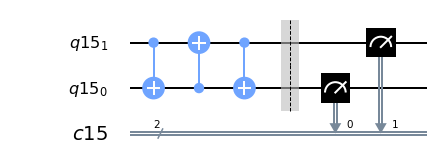

00 is mapped to {'00': 100}


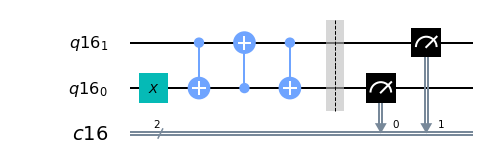

01 is mapped to {'10': 100}


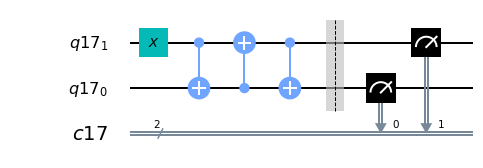

10 is mapped to {'01': 100}


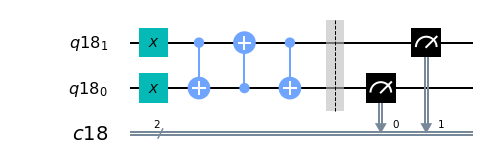

11 is mapped to {'11': 100}


In [15]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
pairs = ['00','01','10','11']

for input in pairs:
    q =  QuantumRegister(2) 
    c = ClassicalRegister(2)
    qc = QuantumCircuit(q,c) 
   
    if input[0]=='1':
        qc.x(q[1]) 
    if input[1]=='1':
        qc.x(q[0]) 

    # Apply CNOT(first-qubit,second-qubit).
    qc.cx(q[1],q[0])
    
     # Apply CNOT(second-qubit,first-qubit).
    qc.cx(q[0],q[1])
    
     # Apply CNOT(first-qubit,second-qubit).
    qc.cx(q[1],q[0])

    # Measure the circuit.
    qc.barrier()
    qc.measure(q,c)
    
    # draw the circuit 
    display(qc.draw(output='mpl',reverse_bits=True))
    
    # execute the circuit 100 times 
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(qc)
    print(input,"is mapped to",counts)

[click for our solution](B50_Two_Qubits_Solutions.ipynb#task7)